In [216]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [217]:
df = pd.read_csv("housing.csv")

In [218]:
df = df.drop("ocean_proximity",axis =1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [219]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop("median_house_value",axis =1),df.median_house_value,test_size=0.05,random_state=101)
lr = LinearRegression()
lr.fit(X_train,Y_train)
pri = lr.predict(X_train)


In [220]:
print(f'Predicted value for median house value: {lr.predict([[-119.85,37.48,22,2850,500,1150,400,3.12]])}')
print(f'Value of training weights: {lr.coef_}')
actual = np.array(list(Y_train))
predicted = np.array(list(pri))
print(mean_squared_error(actual,predicted,squared=False))

Predicted value for median house value: [102411.04824779]
Value of training weights: [-4.30776320e+04 -4.28059533e+04  1.13640741e+03 -8.26537227e+00
  1.19764264e+02 -3.81207981e+01  4.00312819e+01  4.01947682e+04]
69633.72002531342


In [221]:
# Learning Curve

size, train_scores, test_scores = learning_curve(lr, X_train, Y_train)

In [222]:
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Text(0, 0.5, 'Loss Score')

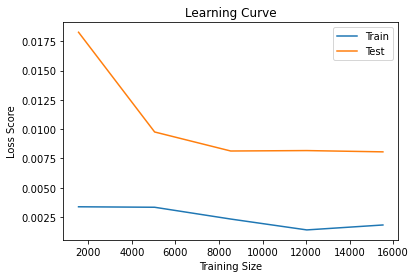

In [223]:
plt.plot(size, train_std)
plt.plot(size, test_std)
plt.legend(['Train', 'Test'])
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Loss Score')